In [43]:
# this is the importing of libraries I will be using

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [44]:
load_dotenv()
map_box_api = os.getenv("map_box_api")

## Loading the Data Set that I am using

In [45]:
# Read the census data into a Pandas DataFrame
file_path = Path("Project_1_Data.csv")
oly_data = pd.read_csv(file_path)
                       #, index_col="Games")
oly_data.head()

ID                           Name Sex   Age  Height  Weight  \
0  22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
1  25072             Evangelos Damaskos   M   NaN     NaN     NaN   
2  40851    Charles Henry Stuart Gmelin   M  23.0     NaN     NaN   
3  41160           Dimitrios P. Golemis   M  21.0     NaN     NaN   
4  58546                  Gyula Kellner   M  24.0     NaN     NaN   

            Team  NOC        Games  Year  Season    City      Sport  \
0  United States  USA  1896 Summer  1896  Summer  Athina  Athletics   
1         Greece  GRE  1896 Summer  1896  Summer  Athina  Athletics   
2  Great Britain  GBR  1896 Summer  1896  Summer  Athina  Athletics   
3         Greece  GRE  1896 Summer  1896  Summer  Athina  Athletics   
4        Hungary  HUN  1896 Summer  1896  Summer  Athina  Athletics   

                        Event   Medal  
0   Athletics Men's Long Jump  Bronze  
1  Athletics Men's Pole Vault  Bronze  
2  Athletics Men's 400 metres  Bronze  
3  Athletics Men's 800 metres  Bronze  
4    Athletics Men's Marathon  Bronze

## Correcting some of the Column Values

In [46]:

oly_data['City'].replace({'Athina': 'Athens', 'Moskva': 'Moscow', 'Sankt Moritz': 'St Moritz'}, inplace=True)
oly_data.head()


ID                           Name Sex   Age  Height  Weight  \
0  22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
1  25072             Evangelos Damaskos   M   NaN     NaN     NaN   
2  40851    Charles Henry Stuart Gmelin   M  23.0     NaN     NaN   
3  41160           Dimitrios P. Golemis   M  21.0     NaN     NaN   
4  58546                  Gyula Kellner   M  24.0     NaN     NaN   

            Team  NOC        Games  Year  Season    City      Sport  \
0  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
1         Greece  GRE  1896 Summer  1896  Summer  Athens  Athletics   
2  Great Britain  GBR  1896 Summer  1896  Summer  Athens  Athletics   
3         Greece  GRE  1896 Summer  1896  Summer  Athens  Athletics   
4        Hungary  HUN  1896 Summer  1896  Summer  Athens  Athletics   

                        Event   Medal  
0   Athletics Men's Long Jump  Bronze  
1  Athletics Men's Pole Vault  Bronze  
2  Athletics Men's 400 metres  Bronze  
3  Athletics Men's 800 metres  Bronze  
4    Athletics Men's Marathon  Bronze

## Changing the Index to City

In [47]:
oly_data.set_index('City')
oly_data.head()

ID                           Name Sex   Age  Height  Weight  \
0  22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
1  25072             Evangelos Damaskos   M   NaN     NaN     NaN   
2  40851    Charles Henry Stuart Gmelin   M  23.0     NaN     NaN   
3  41160           Dimitrios P. Golemis   M  21.0     NaN     NaN   
4  58546                  Gyula Kellner   M  24.0     NaN     NaN   

            Team  NOC        Games  Year  Season    City      Sport  \
0  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
1         Greece  GRE  1896 Summer  1896  Summer  Athens  Athletics   
2  Great Britain  GBR  1896 Summer  1896  Summer  Athens  Athletics   
3         Greece  GRE  1896 Summer  1896  Summer  Athens  Athletics   
4        Hungary  HUN  1896 Summer  1896  Summer  Athens  Athletics   

                        Event   Medal  
0   Athletics Men's Long Jump  Bronze  
1  Athletics Men's Pole Vault  Bronze  
2  Athletics Men's 400 metres  Bronze  
3  Athletics Men's 800 metres  Bronze  
4    Athletics Men's Marathon  Bronze

In [48]:
oly_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [49]:
# indetifying nulls

In [50]:
oly_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [51]:
# dropping nulls from the data set

In [52]:
oly_data = oly_data.dropna()

oly_data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [53]:
oly_data.head()

ID                           Name Sex   Age  Height  Weight  \
0   22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
5   66362  Francis Adonijah "Frank" Lane   M  21.0   170.0    69.0   
12  16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
13  16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
16  22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   

             Team  NOC        Games  Year  Season    City      Sport  \
0   United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
5   United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
12  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
13  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
16  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   

                          Event   Medal  
0     Athletics Men's Long Jump  Bronze  
5    Athletics Men's 100 metres  Bronze  
12   Athletics Men's 100 metres    Gold  
13   Athletics Men's 400 metres    Gold  
16  Athletics Men's Triple Jump    Gold

In [54]:
#oly_data['Medal'].loc[(oly_data['Medal'])] = 1

oly_data['Medal'].replace({'Gold': '1', 'Silver': '1', 'Bronze': '1'}, inplace=True)
oly_data.head()

ID                           Name Sex   Age  Height  Weight  \
0   22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
5   66362  Francis Adonijah "Frank" Lane   M  21.0   170.0    69.0   
12  16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
13  16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
16  22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   

             Team  NOC        Games  Year  Season    City      Sport  \
0   United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
5   United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
12  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
13  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   
16  United States  USA  1896 Summer  1896  Summer  Athens  Athletics   

                          Event Medal  
0     Athletics Men's Long Jump     1  
5    Athletics Men's 100 metres     1  
12   Athletics Men's 100 metres     1  
13   Athletics Men's 400 metres     1  
16  Athletics Men's Triple Jump     1

In [55]:
# changing 'Medal' column from int to float in order to .sum 

oly_data['Medal'] = oly_data['Medal'].astype('float')

oly_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal     float64
dtype: object

In [73]:
#total_medals = oly_data.groupby(['Year', 'Team'])

total_medals = oly_data.groupby('City')

#total_medals = oly_data['Medal'].groupby('Games').sum()

#total_medals = oly_data.groupby('Games')

#total_medals.sum('Medal')

total_medals.head()

ID                           Name Sex   Age  Height  Weight  \
0       22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
5       66362  Francis Adonijah "Frank" Lane   M  21.0   170.0    69.0   
12      16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
13      16616      Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
16      22700  James Brendan Bennet Connolly   M  27.0   175.0    72.0   
...       ...                            ...  ..   ...     ...     ...   
257428  32384              Brady Lee Ellison   M  27.0   181.0    86.0   
257429  59520                      Ki Bo-Bae   F  28.0   167.0    57.0   
257430  67472                  Le Chien-Ying   F  26.0   165.0    69.0   
257431  69994                  Lin Shih-Chia   F  23.0   160.0    65.0   
257432  96508                     Alec Potts   M  20.0   185.0    77.0   

                  Team  NOC        Games  Year  Season            City  \
0        United States  USA  1896 Summer  1896  Summer          Athens   
5        United States  USA  1896 Summer  1896  Summer          Athens   
12       United States  USA  1896 Summer  1896  Summer          Athens   
13       United States  USA  1896 Summer  1896  Summer          Athens   
16       United States  USA  1896 Summer  1896  Summer          Athens   
...                ...  ...          ...   ...     ...             ...   
257428   United States  USA  2016 Summer  2016  Summer  Rio de Janeiro   
257429     South Korea  KOR  2016 Summer  2016  Summer  Rio de Janeiro   
257430  Chinese Taipei  TPE  2016 Summer  2016  Summer  Rio de Janeiro   
257431  Chinese Taipei  TPE  2016 Summer  2016  Summer  Rio de Janeiro   
257432       Australia  AUS  2016 Summer  2016  Summer  Rio de Janeiro   

            Sport                        Event  Medal  
0       Athletics    Athletics Men's Long Jump    1.0  
5       Athletics   Athletics Men's 100 metres    1.0  
12      Athletics   Athletics Men's 100 metres    1.0  
13      Athletics   Athletics Men's 400 metres    1.0  
16      Athletics  Athletics Men's Triple Jump    1.0  
...           ...                          ...    ...  
257428    Archery     Archery Men's Individual    1.0  
257429    Archery   Archery Women's Individual    1.0  
257430    Archery         Archery Women's Team    1.0  
257431    Archery         Archery Women's Team    1.0  
257432    Archery           Archery Men's Team    1.0  

[210 rows x 15 columns]

In [5]:
# Loading coordinates data

file_path_loc = Path("olym_log_lat.csv")
loc_data = pd.read_csv(file_path_loc)

loc_data.rename(columns = {'NOC' : 'noc'}, inplace = True)

loc_data.head()

City         Country  noc Summer Winter  Year   Latitude  Longitude
0     Athens          Greece  GRE      I    NaN  1896  37.983333  23.733334
1      Paris          France  FRA     II    NaN  1900  48.853410   2.348800
2  St. Louis   United States  USA    III    NaN  1904  38.627273 -90.197891
3     London  United Kingdom  GBR     IV    NaN  1908  51.508415  -0.125533
4  Stockholm          Sweden  SWE      V    NaN  1912  59.332577  18.064903

In [52]:
loc_data.round(4)
loc_data.head()

City         Country  noc Summer Winter  Year   Latitude  Longitude
0     Athens          Greece  GRE      I    NaN  1896  37.983333  23.733334
1      Paris          France  FRA     II    NaN  1900  48.853410   2.348800
2  St. Louis   United States  USA    III    NaN  1904  38.627273 -90.197891
3     London  United Kingdom  GBR     IV    NaN  1908  51.508415  -0.125533
4  Stockholm          Sweden  SWE      V    NaN  1912  59.332577  18.064903

In [26]:
loc_data.set_index('City')
loc_data.head()

City         Country  noc Summer Winter  Year   Latitude  Longitude
0     Athens          Greece  GRE      I    NaN  1896  37.983333  23.733334
1      Paris          France  FRA     II    NaN  1900  48.853410   2.348800
2  St. Louis   United States  USA    III    NaN  1904  38.627273 -90.197891
3     London  United Kingdom  GBR     IV    NaN  1908  51.508415  -0.125533
4  Stockholm          Sweden  SWE      V    NaN  1912  59.332577  18.064903

In [45]:

loc_data[loc_data['City']=='Lake Placid']


#'-81.36285': '73.9799'
# loc_data.replace(int(27.2931), 44.2795)
# loc_data.head()

City        Country  noc Summer Winter  Year  Latitude  Longitude
10  Lake Placid  United States  USA    NaN    III  1932   27.2931 -81.362846
31  Lake Placid  United States  USA    NaN   XIII  1980   27.2931 -81.362846

In [46]:
loc_data.dtypes

City          object
Country       object
noc           object
Summer        object
Winter        object
Year           int64
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
oly_data['City'].replace({'Athina': 'Athens', 'Moskva': 'Moscow', 'Sankt Moritz': 'St Moritz'}, inplace=True)

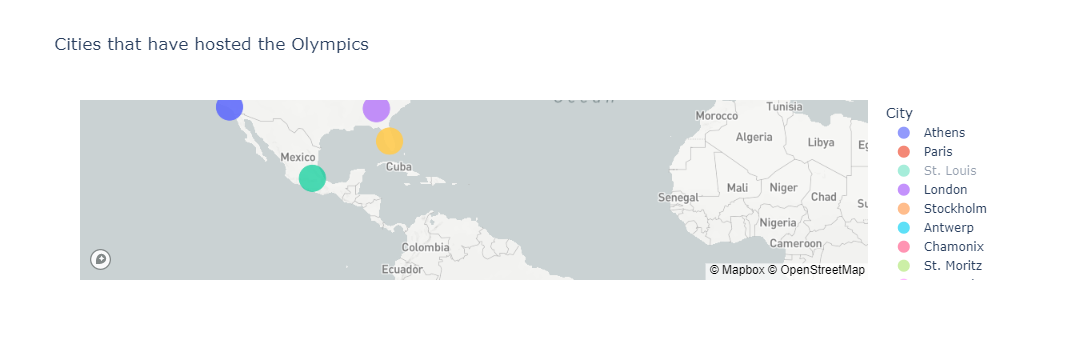

In [38]:
px.set_mapbox_access_token(map_box_api)


# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
map_plot = px.scatter_mapbox(
    loc_data,
    title = "Cities that have hosted the Olympics",
    lat = "Latitude",
    lon = "Longitude",
    color = "City",
    size = "Year",
    hover_name = "City",
    hover_data = ["City"],
    zoom = 10.5,
    
)

map_plot.show()
# Display the map